# Programming Lesson and Exercises - HYP

The goal of these programming lesson and exercises is to teach you how to do hypothesis testing with *Python* and the `StatsModels` library.


This notebook has the following structure:

- The first part introduces the concepts for this week. The theory is interleaved with small exercises, which have the goal of letting you practice the concepts that were just intruduced.
- At the end there are one or more larger exercises, which have the goal to test what you have learned earlier. These will be more difficult and will require more independent work than the exercises in the first part.

All exercises can be solved with the concepts that were introduced earlier. Since there are often more than one correct way to solve a programming problem, we try to accept various correct anwers. However, many of the automatic tests in Momotor (see _How to submit your work_ below) assume that your answers are constructed using the concepts introduced in these notebooks. If you look for answers on the Internet (e.g. if you import other libraries) you run the risk that your answers will be rejected.

Some of the small exercises can be solved by copy-pasting code from the examples. However, it is up to you to try to solve the exercises yourself, which will help you learn, before copy-pasting the answers. The ease of looking up answers is meant to provide guidance when you get stuck, especially for those of you who are new to programming.

For your convenience, in the `support` directory you will find a summary of the Python methods introduced in this notebook.



# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2023-11-01') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [Author]

## Table of Contents

- [Introduction](#Introduction)
    - [Concepts and Terminology](#Concepts-and-Terminology)
    - [Steps to Address the Problem](#Steps-to-Address-the-Problem)
- [Loading the Libraries](#Loading-the-Libraries)
- [1. Hypothesis Testing for Equality of Means](#1.-Hypothesis-Testing-for-Equality-of-Means)
    - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
    - [Example: Speed of Light](#Example:-Speed-of-Light)
    - [Step 1 (Speed of Light): Define Quantitative Question](#Step-1-(Speed-of-Light):-Define-Quantitative-Question)
    - [Step 2 (Speed of Light): Formulate Hypothesis](#Step-2-(Speed-of-Light):-Formulate-Hypothesis)
    - [Step 3 (Speed of Light): Check Assumptions](#Step-3-(Speed-of-Light):-Check-Assumptions)
        - [Kernel Density Plot](#Kernel-Density-Plot)
        - [Q-Q Plot](#Q-Q-Plot)
        - [Anderson-Darling Normality Test](#Anderson-Darling-Normality-Test)
    - [Step 4 (Speed of Light): Apply Appropriate Test](#Step-4-(Speed-of-Light):-Apply-Appropriate-Test)
        - [t-test for Equality of Means (One-sample)](#t-test-for-Equality-of-Means-(One-sample))
        - [t-test for Equality of Means (Two-sample)](#t-test-for-Equality-of-Means-(Two-sample))
    - [Step 5 (Speed of Light): Decision](#Step-5-(Speed-of-Light):-Decision)
        - [Confidence Interval](#Confidence-Interval)
- [Exercise: Cloud Seeding](#Exercise:-Cloud-Seeding)
    - [Step 1 (Cloud Seeding): Define Quantitative Question](#Step-1-(Cloud-Seeding):-Define-Quantitative-Question)
        - [Exercise 1.a](#Exercise-1.a)
    - [Step 2 (Cloud Seeding): Formulate Hypothesis](#Step-2-(Cloud-Seeding):-Formulate-Hypothesis)
        - [Exercise 1.b](#Exercise-1.b)
    - [Step 3 (Cloud Seeding): Check Assumptions](#Step-3-(Cloud-Seeding):-Check-Assumptions)
        - [Exercise 1.c](#Exercise-1.c)
        - [Exercise 1.d](#Exercise-1.d)
        - [Exercise 1.e](#Exercise-1.e)
        - [Exercise 1.f](#Exercise-1.f)
        - [Exercise 1.g](#Exercise-1.g)
        - [Exercise 1.h](#Exercise-1.h)
        - [Exercise 1.i](#Exercise-1.i)
    - [Step 4 (Cloud Seeding): Apply Appropriate Test](#Step-4-(Cloud-Seeding):-Apply-Appropriate-Test)
        - [Exercise 1.j](#Exercise-1.j)
        - [Exercise 1.k](#Exercise-1.k)
        - [Exercise 1.l](#Exercise-1.l)
    - [Step 5 (Cloud Seeding): Decision](#Step-5-(Cloud-Seeding):-Decision)
        - [Exercise 1.m](#Exercise-1.m)
- [2. Hypothesis Testing on Proportions](#2.-Hypothesis-Testing-on-Proportions)
    - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
    - [Example: Exams](#Example:-Exams)
    - [Step 1 (Exams): Define Quantitative Question](#Step-1-(Exams):-Define-Quantitative-Question)
    - [Step 2 (Exams): Formulate Hypothesis](#Step-2-(Exams):-Formulate-Hypothesis)
    - [Step 3 (Exams): Check Assumptions](#Step-3-(Exams):-Check-Assumptions)
    - [Step 4 (Exams): Apply Appropriate Test](#Step-4-(Exams):-Apply-Appropriate-Test)
        - [z-test for Equality of Proportions (One-sample)](#z-test-for-Equality-of-Proportions-(One-sample))
        - [z-test for Equality of Proportions (Two-sample)](#z-test-for-Equality-of-Proportions-(Two-sample))
        - [Extract the p-value](#Extract-the-p-value)
        - [Extract the Confidence Interval (One-sample)](#Extract-the-Confidence-Interval-(One-sample))
        - [Extract the Confidence Interval (Two-sample)](#Extract-the-Confidence-Interval-(Two-sample))
    - [Step 5 (Exams): Decision](#Step-5-(Exams):-Decision)
        - [p-value](#p-value)
        - [Confidence Interval](#Confidence-Interval)
- [Exercise: Silicon Wafers](#Exercise:-Silicon-Wafers)
    - [Exercise 2.a](#Exercise-2.a)
    - [Step 1 (Silicon Wafers): Define a Quantitative Question](#Step-1-(Silicon-Wafers):-Define-a-Quantitative-Question)
        - [Exercise 2.b](#Exercise-2.b)
    - [Step 2 (Silicon Wafers): Formulate Hypothesis](#Step-2-(Silicon-Wafers):-Formulate-Hypothesis)
        - [Exercise 2.c](#Exercise-2.c)
    - [Step 3 (Silicon Wafers): Check Assumptions](#Step-3-(Silicon-Wafers):-Check-Assumptions)
        - [Exercise 2.d](#Exercise-2.d)
    - [Step 4 (Silicon Wafers): Apply Correct Test](#Step-4-(Silicon-Wafers):-Apply-Correct-Test)
        - [Exercise 2.e](#Exercise-2.e)
        - [Exercise 2.f](#Exercise-2.f)
- [3. Performing Diagnostics on Regression Results](#3.-Performing-Diagnostics-on-Regression-Results)
    - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
    - [Example: Boiling Point of Water](#Example:-Boiling-Point-of-Water)
        - [Model Evaluation](#Model-Evaluation)
    - [Exercise: Timber](#Exercise:-Timber)
        - [Exercise 3.a](#Exercise-3.a)
        - [Exercise 3.b](#Exercise-3.b)
        - [Exercise 3.c](#Exercise-3.c)
    - [First Order Polynomial Model](#First-Order-Polynomial-Model)
        - [Exercise 3.d](#Exercise-3.d)
        - [Exercise 3.e](#Exercise-3.e)
        - [Exercise 3.f](#Exercise-3.f)
        - [Exercise 3.g](#Exercise-3.g)
        - [Exercise 3.h](#Exercise-3.h)
    - [Better Model](#Better-Model)
        - [Exercise 3.i](#Exercise-3.i)
        - [Exercise 3.j](#Exercise-3.j)
        - [Exercise 3.k](#Exercise-3.k)
        - [Exercise 3.l](#Exercise-3.l)
        - [Exercise 3.m](#Exercise-3.m)
- [4. Exercise: Hypothesis Testing](#4.-Exercise:-Hypothesis-Testing)
    - [Exercise 4.a](#Exercise-4.a)
    - [Exercise 4.b](#Exercise-4.b)
    - [Exercise 4.c](#Exercise-4.c)
    - [Exercise 4.d](#Exercise-4.d)
    - [Exercise 4.e](#Exercise-4.e)
    - [Exercise 4.f](#Exercise-4.f)
- [5. Exercise: Regression Analysis](#5.-Exercise:-Regression-Analysis)
    - [Exercise 5.a](#Exercise-5.a)
    - [Exercise 5.b](#Exercise-5.b)
    - [Exercise 5.c](#Exercise-5.c)
    - [Exercise 5.d](#Exercise-5.d)
    - [Exercise 5.e](#Exercise-5.e)
    - [Exercise 5.f](#Exercise-5.f)
    - [Exercise 5.g](#Exercise-5.g)

## Introduction

In this lesson,
we explain how to do
hypothesis testing with Python and _StatsModels_ for (all combinations of)

* _one-sided_ and _two-sided_ tests,
* with _one-sample_ and _two-sample_ data,
* for _equality of means_ and for _equality of proportions_.

We also demonstrate how to check the underlying normality assumption on the data.  
In addition, we explain how to perform diagnostics on a regression model.

### Concepts and Terminology

The following concepts are involved in a statistical hypothesis test:
    
1. **Null hypothesis $H_0$**
    (the "there-is-nothing-special-to-this-and-it-is-all-just-coincidence" assumption) and
    **alternative hypothesis $H_a$** (the "there-is-something-special-to-this" assumption).

2. **Level of significance**, also known as $\alpha$-value.
    It is the probability of a _Type-I error_ that one is willing to accept,
    that is, the probability that the null hypothesis will be rejected while it is actually true.
    Typically $\alpha = 0.05$.

3. **Test statistic**:
    a value calculated from the observed data according to a standardized formula,
    which is used in the hypothesis test (function) to either reject or fail to reject $H_0$.
    It depends on the type of test being applied.

4. **p-value** (probability of the observed data under the assumption of the null hypothesis)
    and/or **confidence interval**
    (an interval estimated from the observed data that contains the actual value with a given
    probability, the level of confidence, which is typically $1 - \alpha$).
    
The decision rule is as follows:
if, under the assumption that the null hypothesis holds, the probability of the observed data
is less than $\alpha$,
then the null hypothesis is _rejected_;
that is, the observed data is considered statistically significant ('special')
under the null hypothesis;
that is, the observed data is not likely to be explained by coincidence under the null hypothesis.

Equivalently, this is the case if and only if the computed p-value is less than the significance level.

### Steps to Address the Problem

In the lecture you were shown how to statistically address scientific problems. We will now formalize 5 steps to address these problems:
1. Define quantitative question.
2. Formulate hypothesis.
3. Pick correct test and test if its assumptions are met.
4. Apply correct test.
5. Decision on hypothesis.

These steps will be further explained in the rest of this exercise set.

## Loading the Libraries

To show examples, we load some Data Analytics libraries first:

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns                               # also improves the look of plots

# Configure plots
sns.set()                                           # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5              # default hor./vert. size of plots, in inches

import math
from sklearn.linear_model import LinearRegression   # for linear regression

# Reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML('<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>')

Next, we load the _StatsModels_ library for doing statistics in Python.

In [3]:
import statsmodels.api as sm
import statsmodels

---

## 1. Hypothesis Testing for Equality of Means

### Learning Objectives of This Section

After this section, you should

* know how to do _one-sided_ and _two-sided_ tests for **equality of the means**
    of _one-sample_ and _two-sample_ data;
  
* know how to test whether data follows a normal distribution using:
  * a density plot;
  * a Q-Q plot;
  * the Anderson-Darling test statistic;
  
* know how to draw conclusions about acceptance or rejection of the null hypothesis based on:
  * p-value resulting from the t-test;
  * confidence intervals.
    

### Example: Speed of Light

In the 19th century,
French physicists Fizeau and Foucault independently invented ways to measure the speed of light in vacuum.
Foucault's method turned out to be the most accurate one.
The Foucault method is based on fast rotation mirrors.
The American physicists Michelson and Newcomb improved Foucault's method. 
The dataset `datasets/light_michelson.csv` contains measurements by Michelson from 1880 and `datasets/light_newcomb.csv` contains measurements by Newcomb from 1882.

In [4]:
df_michelson = pd.read_csv("datasets/light_michelson.csv")
df_michelson.head()

,Speed [km/s]
0,299942
1,299832
2,299992
3,300162
4,300022


In [5]:
df_newcomb = pd.read_csv("datasets/light_newcomb.csv")
df_newcomb.head()

,Speed [km/s]
0,299730.154255
1,299814.680525
2,299790.525298
3,299826.759599
4,299778.449144


### Step 1 (Speed of Light): Define Quantitative Question

We wish to test whether Newcombs measurements where accurate. The speed of light in vacuum is defined to be 299 792.458 km/s. We can define a quantitative question as follows:

> Is Newcomb's estimate of the speed of light significantly different from 299 792.458 km/s?

### Step 2 (Speed of Light): Formulate Hypothesis

As we have seen in the lectures, there are two different types of hypotheses which each have their own associated hypothesis test to test them. We are either interested in the **equality of means** or in the **equality of proportions**. It is important to consciously choose between the two.

In our case we are interested in the speed of light measured by Newcomb. We want to compare the experimental data mean (sample average) with the currently known value. Hence we are interested in the **equality of means** on **one-sample** data.

As defined in step 1, we are interested in equality. We do not hypothesize Newcombs measurement to be greater or smaller. Therefore we should formulate a **two-sided** alternative hypothesis. 

In short, we will define a **two-sided** hypothesis for **equality of means** on **one-sample** data.  
The corresponding hypotheses are

$$H_0:\mu_{newcomb}=299792.458$$

$$H_a:\mu_{newcomb}\neq299792.458$$ 

The appropriate test you were taught for this situation is the **t-test for equality of means**.

### Step 3 (Speed of Light): Check Assumptions

As explained in the lecture, a **t-test for equality of means** is appropriate under the assumption that the data comes from a normal distribution *or* the dataset is large. If the dataset is small *and* not normally distributed, the test would not be valid. Therefore, before performing the test we should verify that this assumption holds.

As a rule of thumb in these exercises, a dataset is considered small if it contains fewer than 50 samples. In general, deciding if a dataset should be considered small is complicated, and outside the scope of this course.

We present three techniques to test for normality:

* a **kernel density plot** (which we already encountered in the EDA exercises);
* a **Q-Q plot** (which was mentioned in the EDA Lecture, but not yet practiced);
* the **Anderson-Darling normality test**.

Note that when the dataset is large, normality is not needed for the t-test for equality of means to be valid.

In the examples below we will test the `df_newcomb` data for normality. Let's see how large it is:

In [6]:
len(df_newcomb)

56

Since this dataset contains more than 50 samples, strictly speaking we would not need to test for normality before performing the t-test for equality of means. However, we will still do so to illustrate the methods.

#### Kernel Density Plot

This is a visual check, where you compare the kernel density plot of the actual data to the
'ideal' bell curve of the normal (or Gaussian) distribution.

Let's first set the default figure size to a square aspect ratio.

In [7]:
plt.rcParams['figure.figsize'] = 8, 8  # square plots

Here is the kernel density plot for Newcomb's measurements:

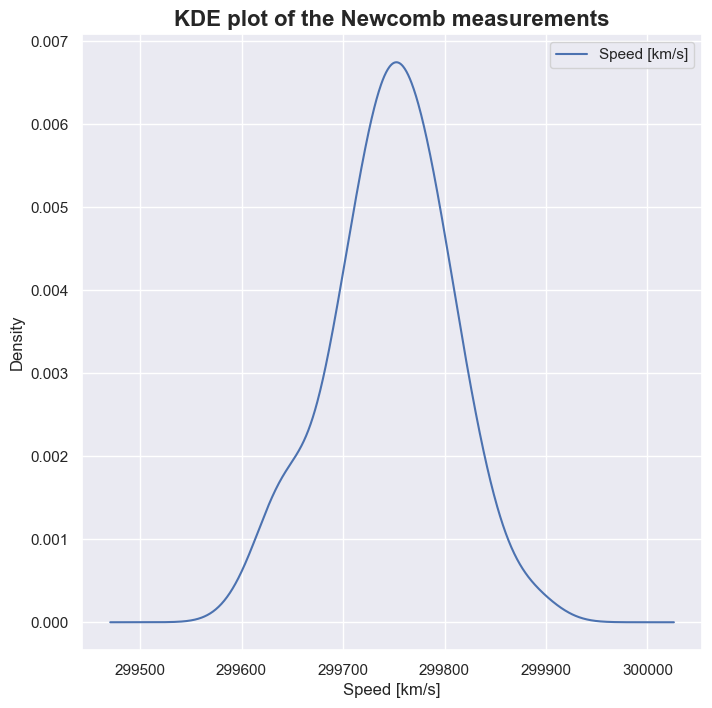

In [8]:
df_newcomb.plot(kind='density')
plt.xlabel("Speed [km/s]")
plt.title("KDE plot of the Newcomb measurements", size=16, weight='bold');

Despite a small wobble, the distribution mostly resembles a normal distribution.

#### Q-Q Plot

While a kernel density plot gives a global overview and can easily indicate patterns in the data like two groups or asymmetry, you cannot see whether the normal distribution really fits (e.g., you cannot easily ascertain from it whether tails decay sufficiently fast). This is where a Q-Q plot can be used.

In a Q-Q plot, the data is transformed such that a normal distribution would follow a straight line at 45 degrees. The straight line is convenient since it is easy to check visually whether points are on a straight line.

You can create Q-Q plots using **`sm.qqplot()`**
([documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)).

> **Note:** Unlike the other plotting methods we used in this course, `sm.qqplot()` does not return an `axes` object. Therefore, to assign a title using `.set_title()` we manually create a 1x1 subplot.

Let us create a Q-Q plot for the speed of light data:

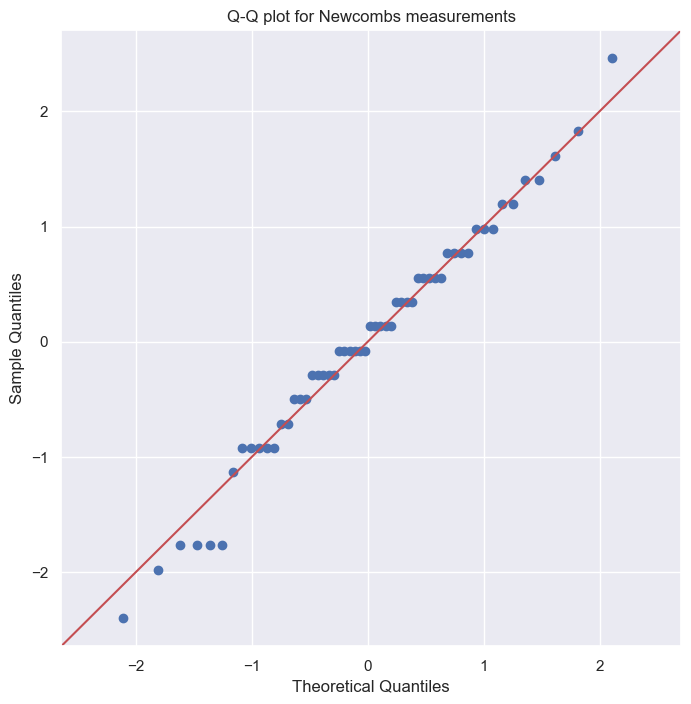

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, squeeze=False)
sm.qqplot(df_newcomb['Speed [km/s]'], fit=True, line='45', ax=ax[0,0])
ax[0,0].set_title('Q-Q plot for Newcombs measurements');

In a Q-Q plot, the closer the data points stay to the diagonal (45-degree line in red),
the more the data follows a normal distribution.  
Here, the data again seems to be reasonably normally distributed.

#### Anderson-Darling Normality Test

We can also compute a (numerical) test statistic that tests for normality,
using **`sm.stats.normal_ad()`**
([documentation](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.normal_ad.html)).
It returns a pair: the **Anderson-Darling test statistic** (a floating-point number) and
its **p-value**.

When conducting an Anderson Darling test, we assume that the data is normally distributed. This is our null hypothesis. The first number returned by the function is the test statistic. The second number is the p-value. This p-value expresses the likelihood that the test statistic has this value under the null hypothesis. If this p-value is lower than 0.05, there is a less than 5% chance that this data would occur when drawn from a normal distribution. In that case we reject the null hypothesis and thus normality of our data.

We compute the Anderson-Darling test statistic and the p-value for the data:

In [10]:
sm.stats.normal_ad(df_newcomb['Speed [km/s]'])

(0.33500708086568665, 0.5017926373917099)

In our case,
the p-value (the **second** element of the tuple) is much larger than 0.05,
indicating that this data set is **not** unlikely under the assumption
that it is from a normal distribution.

None of the three methods provide evidence that the normality assumption is violated, so we can safely apply the **t-test for equality of means**.

### Step 4 (Speed of Light): Apply Appropriate Test

We defined a **two-sided** hypothesis for **equality of means** on **one-sample** data and verified that the assumption of normality does not appear to be violated. Now we can apply the appropriate test. In our case this is the **t-test for equality of means**.

We wish to test whether the mean of the sample is equal to the currently known value for the speed of light, or if there is a significant difference.


#### t-test for Equality of Means (One-sample)

For convenience, we repeat our hypothesis

$$H_0:\mu_\text{newcomb} = 299792.458$$

$$H_a:\mu_\text{newcomb} \neq 299792.458$$

Carrying out this kind of test in Python with _StatsModels_ involves three steps:

1. **Preprocess the data** using **ds = `sm.stats.DescrStatsW()`**.
1. **Extract test parameters** using

    * **`ds.ttest_mean(value, alternative='...')`** for **t-test statistic**, **p-value**, and
        **degrees of freedom**,
    * **`ds.tconfint_mean(alpha=..., alternative='...')`** for the **confidence interval**
    
    where
    
    * `value` is the value we are comparing the sample mean to,
    * `alternative=` one of 

        - `'two-sided'` (meaning the alternative hypothesis is $\mu \neq \mu_0$);
        - `'larger'` (meaning the alternative hypothesis is $\mu > \mu_0$),
        - `'smaller'` (meaning the alternative hypothesis is $\mu < \mu_0$),

    * `alpha=` the significance level, e.g. `alpha=0.05` corresponds to a 95% confidence interval.

**Preprocess the data (one-sample)**

First, we preprocess the data sample and its expected mean separately.
The resulting objects will be inputs to the actual comparison test.

In [11]:
d_newcomb = sm.stats.DescrStatsW(df_newcomb['Speed [km/s]'])

**Extract t-test statistic and p-value (one-sample)**

The function `ds.ttest_mean(alternative='...')`
returns the value of the t-test statistic and its p-value.
It also returns as a third value the *degrees of freedom*,
but this value can be ignored since we will not use it.

Here are these values for the two-sided test, as we are considering the following alternative hypothesis:
$𝐻_𝑎:\mu_{newcomb}\neq 299792.458$

In [12]:
d_newcomb.ttest_mean(299792.458, alternative='two-sided')

(-5.957593962870322, 1.8835359208278103e-07, 55.0)

The **p-value** is the value in the middle.

**Extract confidence interval (one-sample)**

The function `ds.tconfint_mean(alpha=..., alternative='...')` returns the
confidence interval for the mean of the sample, with a confidence level of $1 - \alpha$.
For $\alpha=0.05$ this interval contains the mean with a probability of 0.95.

In [13]:
d_newcomb.tconfint_mean(alpha=0.05, alternative='two-sided')

(299731.10613570415, 299761.9922101517)

> **Note:** A one-sided interval with $\alpha=0.025$ has one boundary in common with the two-sided interval with $\alpha=0.05$. See the output of the next code cell.

In [14]:
d_newcomb.tconfint_mean(alpha=0.025, alternative='larger'), d_newcomb.tconfint_mean(alpha=0.025, alternative='smaller')

((299731.10613570415, inf), (-inf, 299761.9922101517))

#### t-test for Equality of Means (Two-sample)

Let us now compare the measurements by Newcomb to those by Michelson to see if their speed of light estimates were actually that different.  
Our hypothesis becomes

$$H_0:\mu_\text{newcomb} = \mu_\text{michelson}$$

$$H_a:\mu_\text{newcomb} \neq \mu_\text{michelson}$$

This is an example of a **two-sided** hypothesis for **equality of means** on **two-sample** data.

> **Note:** Before we apply the test we must check that all the assumptions are met, i.e. that both samples (Newcomb's and Michelson's) come from a normal distribution or that they are large. We did the check for Newcomb data already. If you do the check for Michelson data you will see that the condtion is also met.

Carrying out this kind of test in Python with _StatsModels_ involves two steps:

1. **Preprocess the data** using **`sm.stats.DescrStatsW()`**, creating *descriptive statistics objects* **`d1`** and **`d2`** for the two samples we want to compare,
1. **Extract test parameters** using
    * **`cm = sm.stats.CompareMeans(d1, d2)`** to create a *test object* **`cm`**, comparing **`d1`** to **`d2`**,
    * **`cm.ttest_ind(alternative='...')`** for **t-test statistic**, **p-value**, and
        **degrees of freedom**,
    * **`cm.tconfint_diff(alpha=..., alternative='...')`** for the **confidence interval**,
    
    where
    * `alternative=` one of
        - `'two-sided'` (meaning the alternative hypothesis is $\mu_1 \neq \mu_2$),
        - `'larger'` (meaning the alternative hypothesis is $\mu_1 > \mu_2$),
        - `'smaller'` (meaning the alternative hypothesis is $\mu_1 < \mu_2$),
    * `alpha=` the significance level, e.g. `alpha=0.05` corresponding to the 95% confidence interval.

**Preprocess the data (two-sample)**

First, we preprocess the data sample and its expected mean separately.
The resulting objects will be inputs to the actual comparison test.

In [15]:
d_newcomb = sm.stats.DescrStatsW(df_newcomb['Speed [km/s]'])
d_michelson = sm.stats.DescrStatsW(df_michelson['Speed [km/s]'])

Next, we create the test object using the preprocessed data:

In [16]:
cm = sm.stats.CompareMeans(d_newcomb, d_michelson)

**Extract t-test statistic and p-value (two-sample)**

The function `cm.ttest_ind(alternative='...')`
returns the value of the t-test statistic and its p-value.
It also returns as third value the *degrees of freedom*,
but this value can be ignored since we will not use it.

Here are these values for the two-sided test, as we are considering the following alternative hypothesis:
$𝐻_𝑎:\mu_{newcomb} \neq \mu_{michelson}$

In [17]:
cm.ttest_ind(alternative='two-sided')

(-16.437497750224615, 1.0487810072421076e-35, 154.0)

The **p-value** is the value in the middle.

**Extract confidence interval (two-sample)**

The function `cm.tconfint_diff(alpha=..., alternative='...')` returns the
confidence interval for the _difference between the means_ of the two samples (first minus second),
with a confidence level of $1 - \alpha$.
For $\alpha=0.05$ this interval contains the actual difference between the means with a probability of 0.95.

In [18]:
cm.tconfint_diff(alpha=0.05, alternative='two-sided')

(-221.6288954940909, -174.07275865012264)

### Step 5 (Speed of Light): Decision

The **p-value** and the **confidence interval** both express the same information in a different form. 

#### p-value

The **p-value** is the easiest to interpret. When it is lower than a chosen significance level $\alpha$ (typically $0.05$) we reject the null hypothesis.
- From the p-value calculated in step 4 for the *one-sample* case, 
we see that in the case of a two-sided test with $\alpha=0.05$,
the *null hypothesis is rejected* (as this p-value is smaller than $0.05$).

- From the p-value calculated in step 4 for the *two-sample* case, 
we see that in the case of a two-sided test with $\alpha=0.05$,
the *null hypothesis is also rejected*.

#### Confidence Interval

For the *one-sample* case, the **confidence interval** can be interpreted in the following way. The confidence interval expresses the values between which the *mean* lies with 95% confidence. If the confidence interval contains the reference value (i.e., no evidence for a difference in means) we cannot reject the null hypothesis. Otherwise, we reject the null hypothesis.

From the confidence interval calculated in step 4 for the *one-sample* case, we can see that the *null hypothesis is rejected*, because it does not contain the reference value for speed of light 299792.458.

For the *two-sample* case, the **confidence interval** can be interpreted in the following way. The confidence interval expresses the values between which the *difference between means* lies with 95% confidence. If the confidence interval contains 0 (i.e., no evidence for a difference in means) we cannot reject the null hypothesis. Otherwise, we reject the null hypothesis.

From the confidence interval calculated in step 4 for the *two-sample* case, we can see that the *null hypothesis is rejected*, because it does not contain the value 0, meaning that means are different.

Observe that the results of the hypothesis tests according to the p-values and the confidence intervals are the same, which is as it should be.

## Exercise: Cloud Seeding

You are now going to repeat the preceding tests for equality of the means for a different dataset on _cloud seeding_.

To improve rain fall in dry areas, an experiment was carried out with 52 clouds.
Scientists investigated whether the addition of _silver nitrate_ __increases__ the rainfall.
They chose 26 out of a sample of 52 clouds and seeded them with silver nitrate.
The remaining 26 clouds were not treated with silver nitrate.

The data set `./datasets/clouds.csv` records the rainfall in _feet per acre_.
The dataset was constructed to test whether the addition of silver nitrate on clouds causes more rainfall.
There are two samples: one column _with_ the silver nitrate treatment and one column _without_ the treatment.

In [19]:
df_clouds = pd.read_csv("./datasets/clouds.csv")
df_clouds

,without,with
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4
5,244.3,489.1
6,163.0,430.0
7,147.8,334.1
8,95.0,302.8
9,87.0,274.7


Your task in this exercise is to perform the correct statistical test to investigate whether cloud seeding has the desired effect.

### Step 1 (Cloud Seeding): Define Quantitative Question

#### Exercise 1.a
Choose the option that matches our situation best and assign either `'a'`, `'b'`, `'c'` or `'d'` to the variable `question_cloud`.

> a. Does cloud seeding work? <br>
> b. Is there a difference in average rainfall when cloud seeding has been applied? <br>
> c. Does the application of cloud seeding increase average rainfall?<br>
> d. Does the application of cloud seeding increase proportion of rainfall?

In [20]:
#// BEGIN_TODO [HYP_1a] Define quantitative question (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1a]

### Step 2 (Cloud Seeding): Formulate Hypothesis

#### Exercise 1.b
Formulate statistical hypotheses based on the question you chose above. Encode them as strings in the following way:

- For the null hypothesis use `'mu_with=mu_without'`, using `mu_with` and `mu_without` to denote the means of the clouds with and without cloud seeding respectively.
- For the alternative hypothesis use `!=`, `>` or `<`, e.g. `'mu_with<mu_without'`.

Assign the null and alternative hypotheses encoded as strings to variables `H_0_cloud` and `H_a_cloud`, respectively.

In [21]:
#// BEGIN_TODO [HYP_1b] Formulate hypothesis(1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1b]
H_0_cloud, H_a_cloud

NameError: name 'H_0_cloud' is not defined

### Step 3 (Cloud Seeding): Check Assumptions

The t-test is valid for large datasets, or for small datasets that follow the normal distribution. Our rule of thumb in these exercises says that a dataset is considered small when it contains fewer than 50 samples. If we look at the number of samples in the `df_clouds` dataframe

In [ ]:
len(df_clouds)

we can see that there are relatively few samples, so we should check for normality. We will use the three techniques to test for normality:

* A **kernel density plot**
* A **Q-Q plot** 
* The **Anderson-Darling normality test**

Note that if the dataset is large, we do not need to check for normality before applying the t-test for equality of means.

#### Exercise 1.c

Create, in one figure, superimposed density plots of the data _with_ and _without_ seeding.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Select both columns separately, and create a density plot from both of them. Add a legend to keep both density plots apart.
</span>

In [ ]:
#// BEGIN_TODO [HYP_1c] Density plots of data (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1c]

#### Exercise 1.d

Create two separate (juxtaposed) Q-Q plots for the data _with_ and _without_ seeding. Place the plots next to each other and do not forget to add titles.

In [ ]:
#// BEGIN_TODO [HYP_1d] Q-Q plot for data with and without seeding (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1d]

#### Exercise 1.e

Apply the Anderson-Darling normality test to the data _with_ and _without_ seeding, and assign the resulting **p-values** to the variables `p_anderson_darling_with` and `p_anderson_darling_without`, respectively.

In [ ]:
#// BEGIN_TODO [HYP_1e] Anderson-Darling normality test for data with and without seeding (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1e]

p_anderson_darling_with, p_anderson_darling_without

From above results you should notice the following things:
 * The long wobbly tails on the right in the kernel density plot indicate that this is not really a normal distribution. 
 * In the Q-Q plots, the points stray far from the line.
 * In the Anderson-Darling test in both cases, the p-values are extremely small, indicating that these data sets are very unlikely under the assumption that they are from a normal distribution.

 This is a problem: the dataset is relatively small and the assumption of normality appears to be violated, which means that we should **not** apply a t-test.

However, a distribution skewed to the right can in some cases be transformed into in a normal distribution by taking the (natural) logarithm of the data.  
To attempt this, we add two columns to the data frame:

In [ ]:
df_clouds['with_log'] = np.log(df_clouds['with'])
df_clouds['without_log'] = np.log(df_clouds['without'])
df_clouds.describe()

You are now going to repeat the preceding normality tests on the transformed data to see if it now resembles a normal distribution.

#### Exercise 1.f
Create density plots of the  log-transformed data

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Select both columns separately, and apply a density plot. Add a legend to keep both density plots apart.
</span>

In [ ]:
#// BEGIN_TODO [HYP_1f] Density plots of log-transformed data (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1f]

#### Exercise 1.g

Create two separate (juxtaposed) Q-Q plots for the log-transformed data _with_ and _without_ seeding. Place the plots next to each other and do not forget to add titles.

In [ ]:
#// BEGIN_TODO [HYP_1g] Q-Q plot for log-transformed data with and without seeding (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1g]

#### Exercise 1.h
Apply the Anderson-Darling normality test to the log-transformed data with and without cloud seeding. Assign the resulting **p-values** to `p_anderson_darling_with_log` and `p_anderson_darling_without_log`.

In [ ]:
#// BEGIN_TODO [HYP_1h] Anderson-Darling normality tests for log-transformed data (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1h]

p_anderson_darling_with_log, p_anderson_darling_without_log

#### Exercise 1.i

Does the log-scaled data seem to follow a normal distribution? Assign your (boolean) answers to the variables `normal_cloud_with` and `normal_cloud_without`.

In [ ]:
#// BEGIN_TODO [HYP_1i] Does the log-scaled data follow a normal distribution (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1i]

### Step 4 (Cloud Seeding): Apply Appropriate Test

#### Exercise 1.j
Preprocess each of the two data samples separately. 
Use the **log-transformed** data! Assign the results to `d_with_log` and `d_without_log`

In [ ]:
#// BEGIN_TODO [HYP_1j]  Preprocess the log-transformed data (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1j]

#### Exercise 1.k
Create the test object using the preprocessed data.
Assign this test object to `cm_cloud_log`.

In [ ]:
#// BEGIN_TODO [HYP_1k] Create test object (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1k]

#### Exercise 1.l

Perform the appropriate test for the hypothesis you chose in Exercise 1.b. Assign the resulting **p-value** to `p_cloud_log`.

In [ ]:
#// BEGIN_TODO [HYP_1l] apply test on (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1l]

p_cloud_log

### Step 5 (Cloud Seeding): Decision

#### Exercise 1.m

What is your conclusion? Is there sufficient evidence to reject the null hypothesis (at significance level $\alpha=0.05$) based on the log-transformed data? Assign your (boolean) answer to the variables `reject_null_cloud_log`.

In [ ]:
#// BEGIN_TODO [HYP_1m] Decision for confidence limits (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_1m]

---

## 2. Hypothesis Testing on Proportions

### Learning Objectives of This Section

After this section, you should

* know how to do _one-sided_ and _two-sided_ tests for **equality of proportions**
    of _one-sample_ and _two-sample_ data;
* know how to draw conclusions about acceptance or rejection of the null hypothesis based on:
  * p-value resulting from the z-test;
  * confidence intervals.

### Example: Exams

We now explore hypothesis testing on proportions.
For these tests we only need the number of observations and the number of successes.

Let us look at a class of students following a course.
The class has 100 students, and 88 pass their exam.
The previous year there were 89 students and 70 passed the exam.
The teacher has made large improvements to her course according to the feedback she has gotten from student reviews.
The expectation is therefore that the passing rate has gone up.

We set up the data in these variables:

* `students` for the total number of students (this year);
* `passes` for the number of students who passed the exam (this year);
* `students_previous` for the total number of students in the previous year;
* `passes_previous` for the number of students that passed in the previous year.

From this data we can compute the passing rate for both years.

In [ ]:
students = 100
passes = 88

rate = passes / students

students_previous = 89
passes_previous = 70

rate_previous = passes_previous / students_previous

rate, rate_previous

Again we will follow the four steps as explained above.

### Step 1 (Exams): Define Quantitative Question

From the introduction above we can conclude that we want to investigate whether or not the passing rate has improved. We can define the following quantitative question.

> Is the proportion of students that passed the exam this year significantly larger than the proportion of students that passed last year?

### Step 2 (Exams): Formulate Hypothesis

Again we should pay attention to the following: do we want to test for the equality of means or the equality of proportions?

In this case we are interested in the **fraction** of the students that have failed. Hence we are interested in the **equality of proportions**

As defined in step 1, we want to investigate whether or not the passing rate has improved. From the context we have a clear indication of a direction in which we expect the proportion to change. Therefore we should formulate a **one-sided** alternative hypothesis. 

In short, we will define a **one-sided** hypothesis for **equality of proportions** on **two-sample** data

The corresponding hypotheses are

$$H_0: p_{new} = p_{old}$$

$$H_a: p_{new} > p_{old}$$

### Step 3 (Exams): Check Assumptions

In the case of testing for equality of proportion we do not assume our data to come from a normal distribution.
Therefore we do not have to check for normality and can thus ignore this step.
There are other assumptions when testing proportions and ways to check these assumptions, but they are outside the scope of this course.

### Step 4 (Exams): Apply Appropriate Test

We defined a **one-sided** hypothesis for **equality of proportions** on **two-sample data**. Now we can apply the appropriate test. In our case this is the

* **z-test for equality of proportions**.

We can extract the z-test statistic and p-value using

**`sm.stats.proportions_ztest(count, number_observations, value=..., alternative=...)`**

The `proportions_ztest()` function returns a pair: the z-test statistic and the corresponding **p-value**.

#### z-test for Equality of Proportions (One-sample)

In case of a **one-sample** test, the `proportions_ztest()` function takes the following arguments:
- **`count`**: the number of positive observations;
- **`number_observations`**: the total number of observations;
- **`value=`**: the reference proportion you want to compare with;
- **`alternative=`**: one of `'two-sided'`, `'larger'`, or `'smaller'`.

#### z-test for Equality of Proportions (Two-sample)

In case of a **two-sample** test, the `proportions_ztest()` function takes the following arguments:
    
- **`count`**: a list `[num_new_positive_observations, num_old_positive_observations]` containing the number of positive observations in the new and old samples
- **`number_observations`**: a list `[num_new_observations, num_old_observations]` containing the total number of observations in the new and old samples
- **`alternative=`**: one of `'two-sided'`, `'larger'`, or `'smaller'`

We wish to test whether the proportion of students that passed the last exam is larger than the proportion of students that passed in the past (i.e. a two-sample test).
For convenience, we repeat our hypotheses:

$$H_0: p_{new}=p_{old}$$

$$H_a: p_{new}> p_{old}$$

We can now compute the p-value for the z-test for equality of proportions in the following way:

In [ ]:
ztest_exam = sm.stats.proportions_ztest([passes, passes_previous], [students, students_previous], alternative='larger')
ztest_exam

#### Extract the p-value

The **p-value** is again the second element of the returned tuple:

In [ ]:
ztest_exam[1]

####  Extract the Confidence Interval (One-sample)

We can also compute a 95%-confidence interval `CI_exam` for the proportion of passing students,
using function **`sm.stats.proportion_confint(count, number_observations, alpha=...)`**.


In [ ]:
CI_exam = sm.stats.proportion_confint(passes, students, alpha=0.05)
CI_exam

In [ ]:
rate_previous

### Step 5 (Exams): Decision

The **p-value** and the **confidence interval** both express the same information in a different form. 

#### p-value

The **p-value** is the easiest to interpret. When it is lower than a chosen $\alpha$ (typically $0.05$) we reject the null hypothesis.

For the p-value calculated in step 4, we can see that in the case of $\alpha=0.05$ the *null hypothesis is rejected*, because the p-value is below 0.05.

#### Confidence Interval

The **confidence interval** can be interpreted in the following way. The confidence interval expresses the values between which the *proportion* lies with 95% confidence. If the confidence interval contains the reference value we cannot reject the null hypothesis. Otherwise, we reject the null hypothesis.

From the confidence interval calculated in step 4, we can see that the *null hypothesis is rejected*, because it does not contain the reference value `rate_previous`.

---

## Exercise: Silicon Wafers

A wafer is a slice of silicon from which chips are made
for use as integrated circuits in devices like smart phones.
An important quality characteristic in integrated-circuit manufacturing is
the thickness of the wafer.
As a routine, the thickness is measured in a gage, only giving two results: good or bad.

It is known from previous years that $15\%$ of the wafers are bad.
A new batch arrives and a sample of $50$ wafers is taken from this new batch.
The number of bad wafers in this sample equals $13$.
We would like to know whether or not there is a difference in the fraction of bad wafers.

#### Exercise 2.a

Compute the fraction of bad wafers in the new sample. Assign the number of wafers and number of bad wafers to the variables `num_wafers` and `num_bad_wafers`,
and the old and the new proportion to the variables
`prop_bad_wafers_old` and `prop_bad_wafers_new`.

In [ ]:
#// BEGIN_TODO [HYP_2a] Wafers, bad wafers, old and new proportion (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2a]

num_wafers, num_bad_wafers, prop_bad_wafers_old, prop_bad_wafers_new

### Step 1 (Silicon Wafers): Define a Quantitative Question

#### Exercise 2.b

Choose the most appropriate quantitative question for our example.
Assign `'a'`, `'b'` or `'c'` to the variable `question_wafers`

> a. Has the proportion of bad wafers in the new batch changed compared to previous years?<br>
> b. Has the average of bad wafers in the new batch changed compared to previous years?<br>
> c. Is the proportion of bad wafers in the new batch greater than previous years?

In [ ]:
#// BEGIN_TODO [HYP_2b] Choose quantitative question (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2b]

### Step 2 (Silicon Wafers): Formulate Hypothesis

#### Exercise 2.c

Formulate the question you chose above as statistical hypotheses. Encode them as strings in the following way:

- For the null hypothesis use `'mu_old=mu_new'` or `'p_old=p_new'`, using `mu` to denote means and `p`to denote proportions.
- For the alternative hypothesis use `!=`, `>` or `<`, e.g. `'mu_old<mu_new'`.

Assign the null and alternative hypotheses encoded as strings to variables `H_0_wafers` and `H_a_wafers`, respectively.

In [ ]:
#// BEGIN_TODO [HYP_2c] Formulate Hypothesis (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2c]

### Step 3 (Silicon Wafers): Check Assumptions
#### Exercise 2.d
If there are assumptions you can check please do so.

Assign **True** to the variable `check_assump_wafers` if assumptions need to be checked, **False** if not.


In [ ]:
#// BEGIN_TODO [HYP_2d] Check Assumptions (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2d]

### Step 4 (Silicon Wafers): Apply Correct Test

#### Exercise 2.e

Choose and apply the correct test. Assign the resulting p-value to `p_wafers`.

In [ ]:
#// BEGIN_TODO [HYP_2e] Apply test (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2e]

p_wafers

#### Exercise 2.f

Is there sufficient evidence to reject the null hypothesis (at significance level $\alpha=0.05$)? Assign your (boolean) answer to the variable `reject_null_wafers`.

In [ ]:
#// BEGIN_TODO [HYP_2f] Has the fraction of bad wafers changed? (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_2f]

---
## 3. Performing Diagnostics on Regression Results

### Learning Objectives of This Section

After this section, you should

* know how to inspect normalized residuals of a linear model;
* know how to interpret normalized residual values to indicate wrong model assumption or suspected outliers.

### Example: Boiling Point of Water

In this exercise we use the data set `./datasets/water.csv`. This data set describes an experiment conducted by James David Forbes in 1844 in the Alps to use the boiling point of water to estimate the altitude based on the air pressure. The idea is that it is easier to measure the boiling point of water than the air pressure. The boiling point is available in the column `'bp'` (in degrees Celsius) and the pressure is available in the column `'pres'` (in inches of mercury).


In [ ]:
df_forbes= pd.read_csv("./datasets/water.csv")
df_forbes

First we inspect our data using a scatter plot. In this way we can get an idea of what order polynomial we should fit.

In [ ]:
ax = df_forbes.plot(kind='scatter', x='bp', y='pres', color='b')
ax.set_xlabel('Boiling point (in degrees Celcius)')
ax.set_ylabel('Pressure (in inches of mercury)')
ax.set_title("Pressure vs boiling point of water", size=16, weight='bold');

The scatter plot suggests that a first order polynomial might be a good fit. Let's fit a regression model and investigate these observations.

We fit a linear regression model with the pressure as dependent variable and the boiling point as independent variable. 

Remember that a simple linear regression model tries to find the best fit for $a$ and $b$ in
$$ \text{dependent\_var} = a * \text{independent\_var} + b $$

For this we again use the **Ordinary Least Squares** (OLS) method from the SciKit Learn library, the same as in the DMM exercises.

In [ ]:
X = df_forbes[['bp']]
y = df_forbes['pres']
linear_model = LinearRegression()
linear_model.fit(X, y);

> **Note:** `X` is a `DataFrame` and `y` is a `Series`.

We can visualize the regression model with the _Seaborn_ library.

In [ ]:
ax = sns.regplot(x=df_forbes['bp'], y=df_forbes['pres'], line_kws={'color': 'orange'}, ci=None)
ax.set_xlabel('Boiling point (in degrees Celcius)')
ax.set_ylabel('Pressure (in inches of mercury)')
ax.set_title("Pressure vs boiling point of water", size=16, weight='bold');

#### Model Evaluation

Let us check how well we fit our training data by computing the $R^2$ score:

In [ ]:
linear_model.score(X, y)

$R^2$ is almost 1. Does this mean we fitted the correct linear model?

To evaluate the quality of our linear model, we plot the normalized residuals. Let us compute the residuals:

In [ ]:
y_pred = linear_model.predict(X)
residuals = (y - y_pred)

and normalize them using the `scale()` method from the SciKit Learn library:

In [ ]:
from sklearn.preprocessing import scale

residuals_norm = scale(residuals)

Now we can plot the normalized residuals against the independent variable (i.e. the boiling point).

In [ ]:
df_forbes_vis = df_forbes.copy()
df_forbes_vis['residuals'] = residuals_norm

ax = df_forbes_vis.plot(kind='scatter', x='bp', y='residuals', color='b')
plt.axhline()
ax.set_xlabel('Boiling point (in degrees Celcius)')
ax.set_ylabel('Normalized residuals')
ax.set_title('Normalized residuals for pressure', fontsize=16);

Two things we should note from the above plot. First, the residuals do not seem unstructured. There might be a parabolic shape. This is not completely clear from the plot but such uncertainty indicates that we should at least investigate other regression models.

Secondly, if we assume this parabolic shape, there might be an outlier: the point at around 96.5. This is an interesting find, as it was not visible from the visual inspection of the data.

The first thing we should do here is investigating if there is a better fitting model. Theory around the phenomenon you are studying is usually a good place to start. Theory tells us that there is a linear relation between the temperature and the _log_ of the pressure.

Let us first fit a linear model on the logarithm of the pressure:

In [ ]:
y_log = np.log(df_forbes['pres'])
linear_model_log = LinearRegression()
linear_model_log.fit(X, y_log);

And then draw a scatter plot of the normalized residuals

In [ ]:
y_log_pred = linear_model_log.predict(X)
residual_log = scale(y_log - y_log_pred)

df_forbes_log_vis = df_forbes.copy()
df_forbes_log_vis['residuals'] = residual_log

ax = df_forbes_log_vis.plot(kind='scatter', x='bp', y='residuals', color='b')
plt.axhline()
ax.set_xlabel('Boiling point')
ax.set_ylabel('Normalized residuals')
ax.set_title('Normalized residuals for logarithm of pressure', size=16, weight='bold');

These residuals seem less structured, which indicates that the new model fits the data better.

As indicated in the lecture a normalized residual value higher than 2.5 might indicate an outlier (rule of thumb). Since the normalized residual for the point with pressure 96.4 (log pressure 4.57) is larger than 2.5, this point should be investigated further.

Ideally we would check with the data collector if there is a reason to exclude this point. Perhaps equipment malfunctioned. Since we can no longer ask Dr. Forbes, the rules of scientific integrity dictate that we just have to accept this data point, as we have no good arguments for removing it.

### Exercise: Timber

The value of a timber tree is determined by the volume of it, but this can only be determined after the tree is cut down and sawn up. We somehow would like to predict the volume of the tree from the girth (the circumference) of the tree, and its height, which are easy to measure when the tree is still standing. We will use the dataset in `./datasets/trees.csv` which contains a table with three columns:

- **`girth`**: the girth of a tree at breast height, in inches (1 foot = 12 inches)
- **`height`**: the height of a tree, in feet
- **`volume`**: the volume of timber produced from the tree, in cubic feet

We will fit a regression model with girth and height as independent variables. 

(This exercise was adapted from Bingham and Fry (2010)).

In [ ]:
df_timber = pd.read_csv('./datasets/trees.csv', index_col=0)
df_timber.head()

#### Exercise 3.a

Create a scatter plot of timber volume against tree height.

In [ ]:
#// BEGIN_TODO [HYP_3a] Height vs volume (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3a]

#### Exercise 3.b

Create a scatter plot of timber volume against tree girth. 

In [ ]:
#// BEGIN_TODO [HYP_3b] Girth vs. volume (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3b]

#### Exercise 3.c

What order polynomial appears to be a good fit for a regression model with volume as the dependent variable, and height and girth as independent variables?

> a. A first order polynomial.<br>
> b. A second order polynomial.<br>
> c. A third order polynomial.

Assign your answer (`'a'`, `'b'`, or `'c'`) to `poly_order_timber`

In [ ]:
#// BEGIN_TODO [HYP_3c] Polynomial order (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3c]

### First Order Polynomial Model

Regardless of your answer to the previous question, we will now fit a first order polynomial model and plot the normalized residuals.

#### Exercise 3.d

Construct the training set that will be used for fitting the first order polynomial model, with volume as the dependent variable and both girth and height as independent variables. Assign the data for the independent variables to the data frame `X_timber` and the data for the dependent variable to the series `y_timber`.

In [ ]:
#// BEGIN_TODO [HYP_3d] Define the training dataset (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3d]

#### Exercise 3.e

Fit the first order model, with volume as the dependent variable and both girth and height as independent variables.
Assign the model to the variable `lm_timber`.

In [ ]:
#// BEGIN_TODO [HYP_3e] Fit the first order polynomial model (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3e]

#### Exercise 3.f

Compute the $R^2$ score of the `lm_timber` model on the training data. Assign the score to variable `r_timber`

In [ ]:
#// BEGIN_TODO [HYP_3f] Compute R2 score (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3f]

r_timber

#### Exercise 3.g

Compute the normalized residuals for the training data. Assign them to the variable `residuals_timber`.

In [ ]:
#// BEGIN_TODO [HYP_3g] Model summary (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3g]

#### Exercise 3.h

Create a residual plot using the normalized residuals, with `'girth'` on the $x$-axis.

In [ ]:
#// BEGIN_TODO [HYP_3h] Residual plot (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3h]

Looking at the residual plot, how well does this first order polynomial model perform?

### Better Model

To help define a better fitting model we should look at the following:

The tree girth can be viewed as its circumference. The radius $r$ of the tree can then be computed by 

$$r = \mathsf{girth} / 2\pi$$

The volume of a cylinder of radius $r$ and height $h$ is equal to

$$\pi * r^2 * h$$

Assuming the tree trunk extends to the top of the tree, we can use this formula to estimate the volume of the tree trunk.

#### Exercise 3.i

Add a column called `'volume_est'` to the dataframe `df_timber` with a volume estimate (in cubic feet) for the tree trunk based on the above statements. Use `math.pi` as an approximation of $\pi$.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Remember that `df_timber['girth']` is in inches.
</span>

In [ ]:
#// BEGIN_TODO [HYP_3i] Add volume estimates (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3i]

df_timber.head()

#### Exercise 3.j
Fit a regression model with `volume` as the dependent and `volume_est` as the independent variable. Assign the data for the independent variables to data frame `X_timber_est` and the model to `lm_timber_est`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Reuse the dependent variable `y_timber`.
</span>

In [ ]:
#// BEGIN_TODO [HYP_3j] Fit the better model (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3j]

#### Exercise 3.k

Compute the normalized residuals for the training data in the previous exercise. Assign them to the variable `residuals_timber_est`.

In [ ]:
#// BEGIN_TODO [HYP_3k] Residuals for the better model (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3k]

#### Exercise 3.l
Plot the normalized residuals in `residuals_timber_est`, with `'volume_est'` on the x-axis.

In [ ]:
#// BEGIN_TODO [HYP_3l] Normalized residuals vs volume estimate (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3l]

#### Exercise 3.m

Are there any potential outliers?
Assign your (boolean) answer to `outliers`.

In [ ]:
#// BEGIN_TODO [HYP_3m] Potential outliers (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_3m]

---
## 4. Exercise: Hypothesis Testing

Last week we applied data aggregation and sampling to extract features from the mouse experiment data. Now we will use that same data to verify Fitts's law and draw conclusions about perceived differences in this data.

Fitts's law describes the relation between the distance from a cursor to an object, the size of the object and the time it takes for a user to click the object. In the mouse experiment data was recorded using two different input devices: trackpad and mouse. We use this recorded data to compare the two input methods. 

One can imagine that the use of an interface feels intuitive as long as finding and clicking specific buttons does not take too long. More specifically, it does not matter how long it takes to click a button as long as it does not take longer than, say, one second. We would like to investigate if, for either of the input methods (trackpad vs. mouse), this limit is often exceeded.

Let us first read the data into `df_fitts`, containing data from individual trials,

In [ ]:
df_fitts = pd.read_csv("./datasets/user_trial_props.csv")
df_fitts.head(3)

and visualize the total time of a trial (in seconds) vs. the input method (0 for trackpad and 1 for mouse) using a strip plot:

In [ ]:
ax = sns.stripplot(x='input_method', y='total_time', data=df_fitts, jitter=True, s=1)
ax.set_title("Strip plot of total time per input method", size=16, weight='bold')
ax.set_xlabel('Input method')
ax.set_ylabel('Total time (s)')
ax.set_ylim(0, 5);

Let us extract the total time for the trials recorded using the mouse and trackpad into the series `mouse` and `trackpad`, respectively:

In [ ]:
mouse = df_fitts[df_fitts['input_method'] == 1]['total_time']
trackpad = df_fitts[df_fitts['input_method'] == 0]['total_time']

### Exercise 4.a

Using the goal described above, define a quantitative question, with which you define what you plan to investigate. Use this question to guide your thinking in the next exercises.

Assign `'a'`, `'b'` or `'c'` to the variable `question_fitts`

>a. Is the proportion of trackpad trajectories that take longer than one second significantly larger than the proportion of mouse trajectories that take longer than a second?<br>
b. Is the proportion of trackpad trajectories that take longer than one second significantly different from the proportion of mouse trajectories that take longer than a second?<br>
c. Is the proportion of trackpad trajectories that take longer than one second significantly smaller than the proportion of mouse trajectories that take longer than a second?

In [ ]:
#// BEGIN_TODO [HYP_4a] Formulate quantitative question (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_4a]

###  Exercise <span class="exercise">4.b</span>  

Using the goal described above and the quantitative question you defined, formulate the best fitting hypothesis. Think of the following:

* one- or two-sample data;
* one- or two-sided test;
* equality of means or equality of proportions hypothesis.

Assign to the variable `data_fitts` the string `'one-sample'` if we are dealing with one-sample data and `'two-sample'` if we are dealing with two-sample data.

Assign to the variable `test_fitts` the string `'one-sided'` if a one-sided test should be used and `'two-sided'` if a two-sided test should be used.

Assign the hypotheses as string to variables `H_0_fitts` and `H_a_fitts`. Construct the strings in the following way: `'mu_mouse=mu_trackpad'` or `'p_mouse=p_trackpad'`. Use `mu` when comparing means and `p` when comparing proportions. Use `!=`, `>` or `<` for the alternative hypothesis.

In [ ]:
#// BEGIN_TODO [HYP_4b] Formulate Hypothesis (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_4b]

###  Exercise <span class="exercise">4.c</span> 

Does the choice of hypothesis and the appropriate test for this hypothesis require you to test the normality assumptions? Assign boolean answer to `check_normal_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_4c] Is there a need to check assumptions? (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_4c]

###  Exercise <span class="exercise">4.d</span> 

If you indicated the need to check normality assumptions in the previous question, please do so below. Assign a boolean answer to `normal_fitts`: 

- `True` if the assumptions are met;
- `False` if there is enough evidence to reject normality, or the intended test does not require you to test for normality.

In [ ]:
#// BEGIN_TODO [HYP_4d] Check Assumptions (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_4d]

###  Exercise <span class="exercise" >4.e</span>
Apply the correct test, regardless of the results you found in the previous question.
It is possible that more preprocessing is required. Add more code cells between the markers if you need them. Assign the p-value you found to `p_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_4e] Apply test (1 point)

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [HYP_4e]

p_fitts

###  Exercise <span class="exercise">4.f</span> 
Is there sufficient evidence to reject the null hypothesis (at significance level $\alpha=0.05$)? Assign your (boolean) answer to `reject_null_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_4f] Decision (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_4f]

---
## 5. Exercise: Regression Analysis

Fitts's law describes the relation between the distance between a cursor and an object, the size of the object and the time it takes for a user to click the object. In particular, Fitts's law says that there is a linear relationship between trajectory's *total time* $T$ and its *Index of Difficulty* $I$:

$$T = a * I + b$$

where $I$ is given by

$$I = \log_2 \left( \frac{2D}{R} \right)$$

where $D$ is the *target distance* and $R$ is the *target radius*.

In this exercise we will try to fit the Fitt's model to the trackpad data from the mouse experiment.

###  Exercise 5.a

Select the trackpad trajectories from `df_fitts`. Create a new dataframe `df_regression` with all the trackpad trajectories. Make a copy to avoid altering the original data frame.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Trackpad trajectories have an `input_method` equal to 0.
</span>

In [ ]:
#// BEGIN_TODO [HYP_5a] Create dataframe (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5a]

df_regression.head()

To apply the Fitt's law we will need to construct additional features first. We start by computing the *target distance*, which we will then use together with the *target radius* to compute the *Index of Difficulty*.

### Exercise 5.b

Each trajectory starts at the origin, so with coordinates (0,0). Use this information to calculate the distance of the target from the starting point using the `'target_x'` and `'target_y'` columns. Store the target distance in a new column `'target_distance'` in `df_regression`.

In [ ]:
#// BEGIN_TODO [HYP_5b] Add distance column (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5b]

df_regression.head()

### Exercise 5.c

Recall that the *Index of Difficulty* $I$ is given by:

$$I = \log_2 \left( \frac{2 D}{R} \right)$$

where $D$ is the *target distance* and $R$ is the *target radius*.

Add a column `'ID'` to the data frame containing the Index of Difficulty.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
Use the function `np.log2()`.
</span>

In [ ]:
#// BEGIN_TODO [HYP_5c] Add ID column (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5c]

df_regression.head()

### Exercise 5.d

Plot a scatter plot of the index of difficulty `'total_time'` vs. `'ID'`. Restrict the $y$-axis from $0$ to $5$ seconds and use a point size of $5$.

In [ ]:
#// BEGIN_TODO [HYP_5d] Create scatter diagram (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5d]

### Exercise 5.e

Fit the appropriate regression model. Assign the data for the independent variables to the dataframe `X_fitts`, the data for the dependent variable to the series `y_fitts`, and the model to `lm_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_5e] Fit model (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5e]

### Exercise 5.f

Plot the normalized residuals, with `'ID'` on the x-axis. Assign the normalized residuals to the variable `residuals_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_5f] Create scatter diagram of residuals (1 point)

# ===== =====> Replace this line by your code. <===== ===== #


In [ ]:
#// END_TODO [HYP_5f]

### Exercise 5.g

Are there any data points suspected to be outliers, because of a high normalized residual? Assign your (boolean) answer to `outlier_fitts`.

In [ ]:
#// BEGIN_TODO [HYP_5g] Are there suspicious points? (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [HYP_5g]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology